<a href="https://colab.research.google.com/github/mariaviter/Sales-Analytics-visitors-behaviour-/blob/main/Sales_analytics_new_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1
##The analytics of internet shop sales
(SQL, Python, Tableu used)

###1. Firstly, I connect the Database from Google BigQuery with the help of the Python Code. Then, with the SQL code I retrieve all of the necessary information about orders.


In [ ]:
#Installing the google-cloud-bigquery library
!pip install google-cloud-bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery

In [ ]:
project_id = "data-analytics-mate"

In [ ]:
client = bigquery.Client(project=project_id)

In [ ]:
query = client.query('''
  WITH session_base AS (
  SELECT
    s.ga_session_id,
    s.date AS session_date
  FROM DA.session s
),

session_details AS (
  SELECT
    sp.ga_session_id,
    sp.continent,
    sp.country,
    sp.device,
    sp.browser,
    sp.mobile_model_name,
    sp.operating_system,
    sp.language,
    sp.name AS traffic_source,
    sp.channel AS traffic_channel
  FROM DA.session_params sp
),

account_info AS (
  SELECT
    acs.ga_session_id,
    acs.account_id,
    ac.is_verified,
    ac.is_unsubscribed
  FROM DA.account_session acs
  LEFT JOIN DA.account ac
  ON acs.account_id = ac.id
),

product_info AS (
  SELECT
    o.ga_session_id,
    p.item_id,
    p.category AS product_category,
    p.name AS product_name,
    p.price,
    p.short_description
  FROM DA.product p
  JOIN DA.order o
  ON p.item_id = o.item_id
)

SELECT
  sb.session_date,
  sb.ga_session_id,
  sd.continent,
  sd.country,
  sd.device,
  sd.browser,
  sd.mobile_model_name,
  sd.operating_system,
  sd.language,
  sd.traffic_source,
  sd.traffic_channel,
  ai.account_id,
  ai.is_verified,
  ai.is_unsubscribed,
  pi.product_category,
  pi.product_name,
  pi.price,
  pi.short_description

FROM session_base sb

LEFT JOIN session_details sd ON sb.ga_session_id = sd.ga_session_id
LEFT JOIN account_info ai ON sb.ga_session_id = ai.ga_session_id
LEFT JOIN product_info pi ON sb.ga_session_id = pi.ga_session_id

''')

In [ ]:
df = query.to_dataframe()
df.head()

,session_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,account_id,is_verified,is_unsubscribed,product_category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(direct),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


#Data description

In [ ]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 349545
Number of columns: 18


In [ ]:
#Types of columns present
print(df.dtypes.value_counts())
print('\n')
print(df.info())

object     12
Int64       4
dbdate      1
float64     1
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session_date       349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  traffic_channel    349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  product_category

In [ ]:
n_unique_sessions = df['ga_session_id'].nunique()
# Print the number of unique values
print("Number of unique sessions:", n_unique_sessions)

Number of unique sessions: 349545


In [ ]:
start = df['session_date'].min()
end = df['session_date'].max()
print(f'{end} — {start}')
print(end - start)

2021-01-31 — 2020-11-01
91 days, 0:00:00


###Summary:
Database consists of 18 columns and 349545 rows, hence there are also 349545 unique sessions.

The data types present and how many columns there are for this dtype:
object            12
Int64              4
datetime64[ns]     1
float64            1

The data frame of the data:

2021-01-31 00:00:00 — 2020-11-01 00:00:00
91 days 00:00:00

###Columns explained:

session_date - The date when the session started.

ga_session_id – The unique identifier of the user's session on the website or app, generated by Google Analytics.

continent – The continent from which the session originated, based on the user's IP or device settings.

country – The country from which the session originated.

device – The type of device used during the session (e.g., desktop, mobile, tablet).

browser – The browser used by the user (e.g., Chrome, Safari, Firefox).

mobile_model_name – The specific model of the mobile device used during the session (if available).

operating_system – The operating system of the device used in the session (e.g., iOS, Android, Windows).

language – The language setting of the user's browser.

traffic_source – The name of the source from which the user was referred (e.g., Google, Direct, Facebook).

traffic_channel – The marketing or acquisition channel that led the user to the site (e.g., Organic Search, Email, Paid Search).

account_id – The unique identifier of the registered user account (if the session is linked to a logged-in user).

is_verified – Indicates whether the user has verified their email address (1 for verified, 0 for not verified).

is_unsubscribed – Indicates whether the user has unsubscribed from marketing communications (1 for unsubscribed, 0 for still subscribed).

product_category – The category to which the ordered product belongs (e.g., Electronics, Clothing).

product_name – The name or title of the ordered product.

price – The price of the product at the time of the order.

short_description – A brief description of the product.

#Working with missing data, incorrect data, and anomalies.

In [ ]:
#Checking if the data is in the correct type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session_date       349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  traffic_channel    349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  product_category   33538 non-null   object 
 15  product_name       33538 non-null   object 
 16  pr

In [ ]:
#Transforming "order_date" from object to datetime type
import pandas as pd
df['session_date'] = pd.to_datetime(df['session_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   session_date       349545 non-null  datetime64[ns]
 1   ga_session_id      349545 non-null  Int64         
 2   continent          349545 non-null  object        
 3   country            349545 non-null  object        
 4   device             349545 non-null  object        
 5   browser            349545 non-null  object        
 6   mobile_model_name  349545 non-null  object        
 7   operating_system   349545 non-null  object        
 8   language           235279 non-null  object        
 9   traffic_source     349545 non-null  object        
 10  traffic_channel    349545 non-null  object        
 11  account_id         27945 non-null   Int64         
 12  is_verified        27945 non-null   Int64         
 13  is_unsubscribed    27945 non-null   Int64   

In [ ]:
#Checking if there are any missing values in the table
print(df.isna().sum())

session_date              0
ga_session_id             0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language             114266
traffic_source            0
traffic_channel           0
account_id           321600
is_verified          321600
is_unsubscribed      321600
product_category     316007
product_name         316007
price                316007
short_description    316007
dtype: int64


In this case, we can neither delete nor fill in the missing values, but they are also not crucial for our analysis.


1. language — 177,215 missing values
This is likely because, for some devices or sessions, the language data was simply not collected.

What to do: leave it as it is — this is not critical for most analyses unless the language is a key variable in the research.

2. account_id, is_verified, is_unsubscribed — 376,519 missing values
These are sessions of anonymous users, i.e., people who didn’t log in or register.

What to do: keep the null values — this is expected, since we're analyzing all orders and sessions, including those made by unregistered users.

3. order_date          
product_category     
product_name         
price                
short_description

All of these have 316007 missing values because not all sessions ended up to have an order completed.

What to do: keep the null values - this is expected, since we will also be analyzing sessions without orders.

In [ ]:
# Checking if there are any duplicated rows.
duplicate_rows = df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0         False
1         False
2         False
3         False
4         False
          ...  
349540    False
349541    False
349542    False
349543    False
349544    False
Length: 349545, dtype: bool
0


<Axes: xlabel='price'>

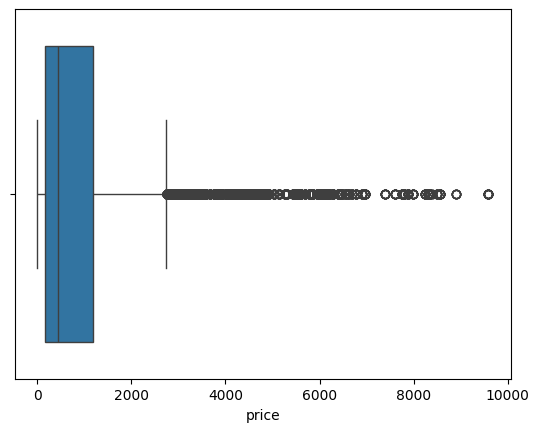

In [ ]:
#Check for negative values or unusually high values in prices.
import seaborn as sns
df[df['price'] < 0]
df['price'].describe()
sns.boxplot(x=df['price'])

In [ ]:
df.sort_values("price", ascending=False).head(10)

,session_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,account_id,is_verified,is_unsubscribed,product_category,product_name,price,short_description
56484,2020-11-18,4399964930,Asia,India,desktop,Chrome,Safari,Macintosh,en-us,(data deleted),Undefined,<NA>,<NA>,<NA>,Sofas & armchairs,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
26461,2020-11-08,33967382,Americas,United States,mobile,Safari,iPhone,iOS,None,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
271372,2021-01-11,8898781390,Americas,United States,mobile,Chrome,<Other>,Web,None,(direct),Direct,<NA>,<NA>,<NA>,Sofas & armchairs,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
276118,2021-01-12,8732751312,Americas,United States,desktop,Chrome,ChromeBook,Web,None,(referral),Paid Search,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
262644,2021-01-08,7939311243,Asia,South Korea,desktop,Firefox,Firefox,Windows,en-us,(direct),Direct,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
176882,2020-12-15,1796579593,Asia,(not set),mobile,Chrome,<Other>,Web,en-us,<Other>,Organic Search,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
298818,2021-01-18,5690528520,Americas,United States,mobile,Safari,iPhone,iOS,None,(organic),Organic Search,<NA>,<NA>,<NA>,Sofas & armchairs,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
197370,2020-12-19,8503211462,Americas,United States,desktop,Chrome,Chrome,Windows,en-us,(referral),Social Search,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
201226,2020-12-21,330119790,Americas,United States,mobile,Safari,iPhone,iOS,None,(data deleted),Undefined,<NA>,<NA>,<NA>,Beds,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"
42788,2020-11-13,2731549856,Americas,United States,desktop,Chrome,Safari,Macintosh,en,(direct),Direct,<NA>,<NA>,<NA>,Sofas & armchairs,LIDHULT,9585.0,"Corner sofa-bed, 6-seat"


From the chart we saw, that of the prices are clustered on the left (lower range), while there are many high values stretching to the right. This indicates a positive skew (long tail on the right).
There are a significant number of outliers — many prices are unusually high.

But from the table see that is not an anomaly, there are just orders with high price things.

In [ ]:
#For each column, check for unexpected or malformed values, typos, empty strings, or rare/unusual entries.
df['country'].value_counts(dropna=False)

,count
country,
United States,153470
India,32763
Canada,25994
United Kingdom,11003
France,6958
...,...
Paraguay,70
Malta,69
Trinidad & Tobago,68


In [ ]:
df['language'].value_counts()

,count
language,
en-us,159893
en-gb,24774
zh,12222
en,11518
en-ca,9332
es-es,5760
fr,5652
de,3387
ko,2741


In [ ]:
df['continent'].value_counts(dropna=False)

,count
continent,
Americas,193179
Asia,83113
Europe,65135
Oceania,3703
Africa,3620
(not set),795


In [ ]:
df['device'].value_counts()

,count
device,
desktop,204429
mobile,137267
tablet,7849


In [ ]:
df['browser'].value_counts()

,count
browser,
Chrome,238460
Safari,83254
<Other>,8930
Edge,8023
Firefox,6433
Android Webview,4445


In [ ]:
df['mobile_model_name'].value_counts()

,count
mobile_model_name,
Chrome,97254
iPhone,71326
Safari,70891
<Other>,70839
ChromeBook,19084
Edge,7907
iPad,5090
Firefox,4874
Pixel 4 XL,1246


In [ ]:
df['operating_system'].value_counts()

,count
operating_system,
Web,203909
Windows,40937
iOS,40102
Android,29808
Macintosh,26116
<Other>,8673


In [ ]:
df['traffic_source'].value_counts()

,count
traffic_source,
(organic),119024
(direct),81382
<Other>,66289
(referral),61436
(data deleted),21414


In [ ]:
df['traffic_channel'].value_counts()

,count
traffic_channel,
Organic Search,124425
Paid Search,94341
Direct,81382
Social Search,27914
Undefined,21483


In [ ]:
df['session_date'].min(), df['session_date'].max()

(Timestamp('2020-11-01 00:00:00'), Timestamp('2021-01-31 00:00:00'))

###Summary:
Data is alright. I changed the dtype for the session date + checked the columns, which might have had any issues. No issues are detected.
ALso, there are no duplicated rows. Missing calues are prsent, but in your tavle they are okay.

# Geographical statics:
##What continents (top-3) and contries (top-5) bring us the highest sales and revenue?

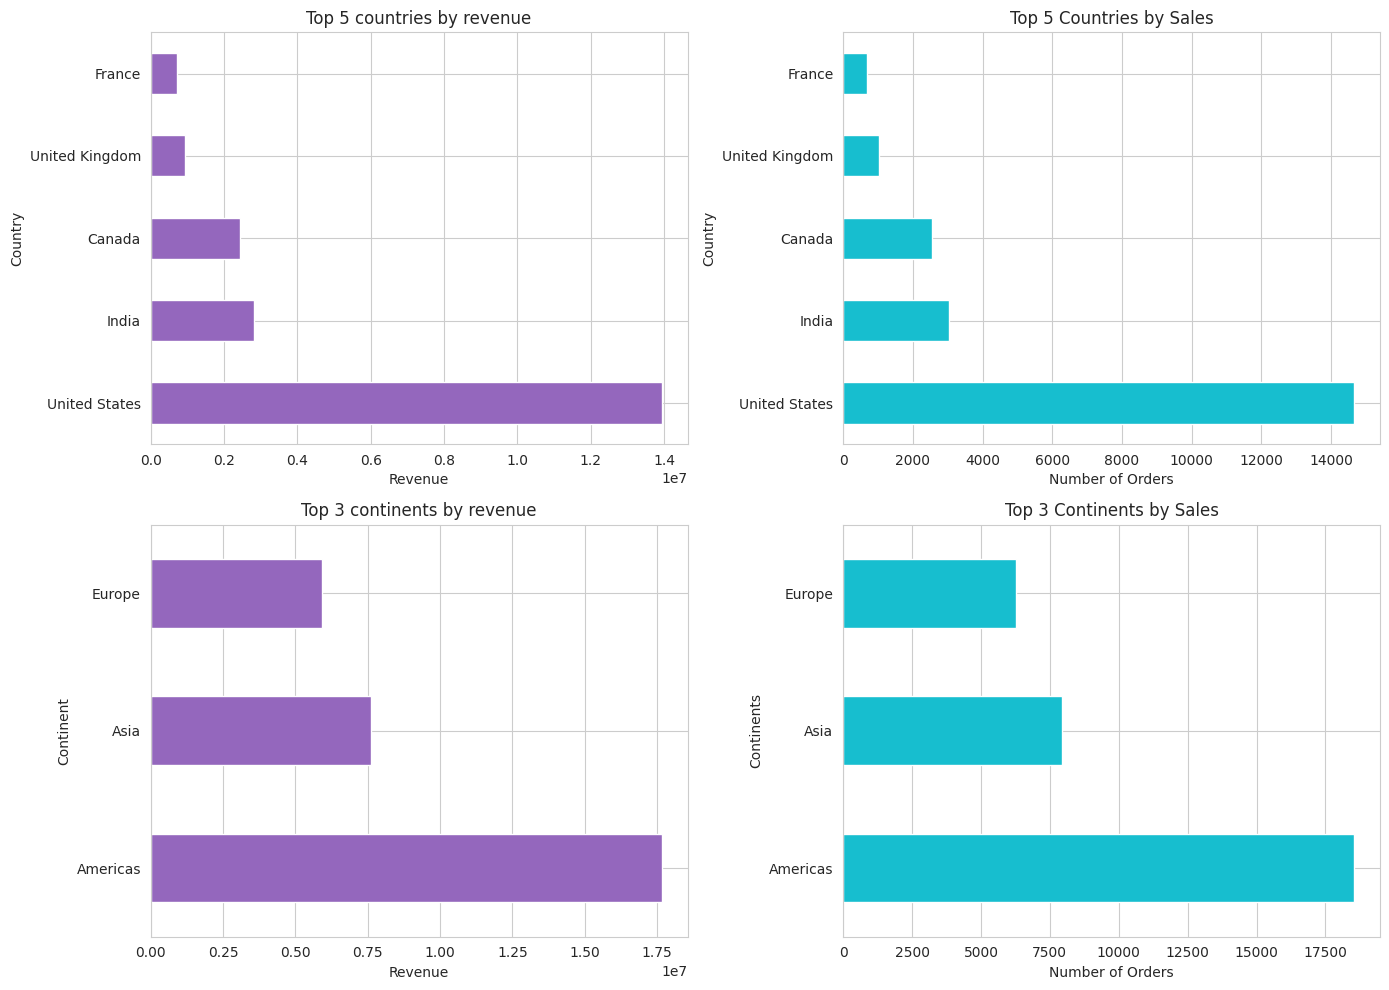

In [ ]:
# Set a clean style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Top countries by revenue.
top_countries = df.groupby('country')['price'].sum().sort_values(ascending=False).head(5)
top_countries.plot(kind="barh", ax=ax[0, 0], color="#9467bd")
ax[0, 0].set_title('Top 5 countries by revenue')
ax[0, 0].set_ylabel('Country')
ax[0, 0].set_xlabel('Revenue')


# Top countries by sales.

orders_df = df[df['price'].notnull()]

top_countries2 = (orders_df.groupby('country')['ga_session_id'].nunique().sort_values(ascending=False).head(5))
top_countries2.plot(kind="barh", ax=ax[0, 1], color="#17becf")
ax[0, 1].set_title('Top 5 Countries by Sales')
ax[0, 1].set_xlabel('Number of Orders')
ax[0, 1].set_ylabel('Country')


# Top continents by revenue.

top_continents = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3)

top_continents.plot(kind="barh", ax=ax[1, 0], color="#9467bd")
ax[1, 0].set_title('Top 3 continents by revenue')
ax[1, 0].set_xlabel('Revenue')
ax[1, 0].set_ylabel('Continent')

# Top continents by sales.

top_continents2 = (orders_df.groupby('continent')['ga_session_id'].nunique().sort_values(ascending=False).head(3))
top_continents2.plot(kind="barh", ax=ax[1, 1], color="#17becf")
ax[1, 1].set_title('Top 3 Continents by Sales')
ax[1, 1].set_xlabel('Number of Orders')
ax[1, 1].set_ylabel('Continents')

plt.tight_layout()
plt.show()



As we can see, top-5 countries in sales and revenue are the USA (a significat leadership), India, Canada, the UK, and France.

Top-3 continents are Americas(a significat leadership), Asia and Europe.

#Top-10 product categories by revenue.

<ipython-input-30-1836877328>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_category.index, y=top_product_category.values, palette='viridis')


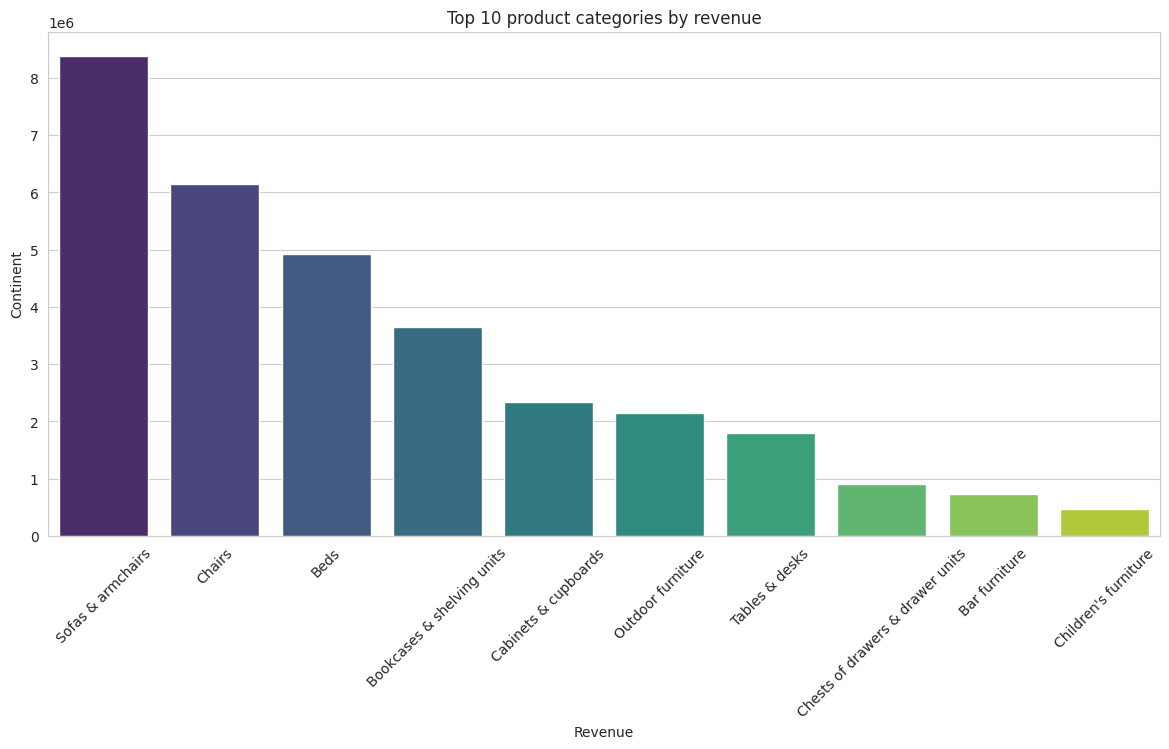

In [ ]:
top_product_category = df.groupby('product_category')['price'].sum().sort_values(ascending=False).head(10)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_product_category.index, y=top_product_category.values, palette='viridis')
plt.title('Top 10 product categories by revenue')
plt.xlabel('Revenue')
plt.ylabel('Continent')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-938992611>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_us_product_category.index, y=top_us_product_category.values, palette='viridis')


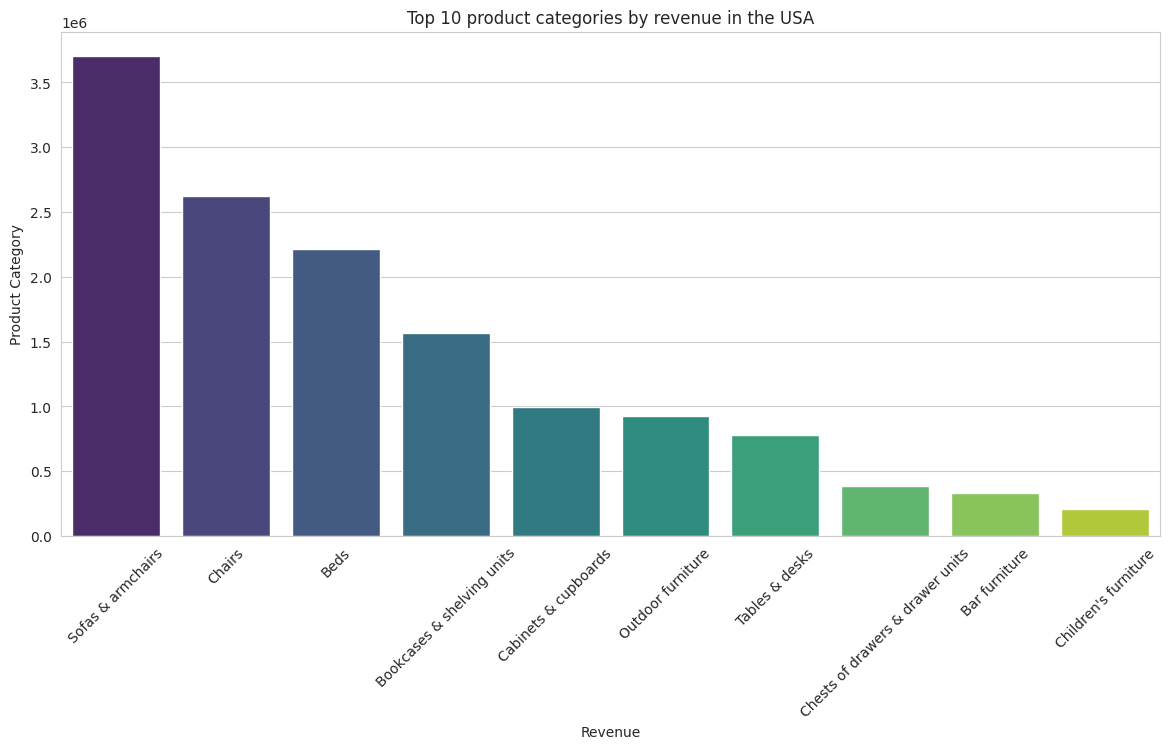

In [ ]:
#Top-10 product categories by revenue in the USA.

us_df = df[df['country'] == "United States"]

top_us_product_category = top_us_product_category = (us_df.groupby('product_category')['price'].sum().sort_values(ascending=False).head(10))

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_us_product_category.index, y=top_us_product_category.values, palette='viridis')
plt.title('Top 10 product categories by revenue in the USA')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

We can see that top-10 categories globally and specifically in the USA (it is the leader among all countries, where we sell) are the same and the dynamic, order between them is also identical.

What this suggests:
Strong Market Consistency: The USA market reflects the global demand pattern, indicating our core product categories perform well internationally, not just domestically.

Strategic Focus: Since the USA dominates sales, prioritizing optimization, promotions, or inventory planning for these categories in the USA could amplify overall revenue impact.

#Sales and revenue by device and mobile types


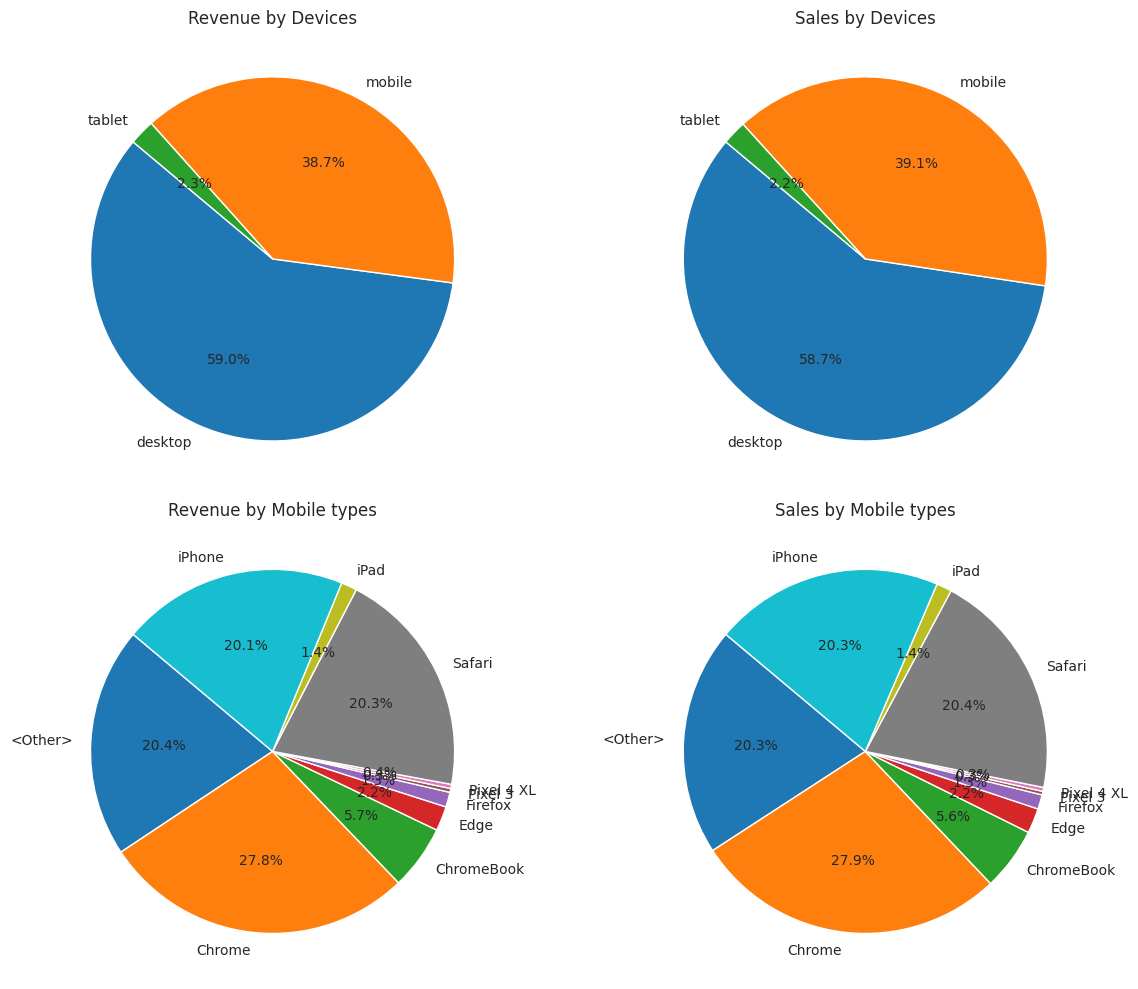

In [ ]:


fig, ax = plt.subplots(2, 2, figsize=(12, 10))

device_group = df.groupby("device")["price"].sum().plot.pie(ax=ax[0, 0], autopct='%1.1f%%', startangle=140)
ax[0, 0].set_title("Revenue by Devices")  # Title of the subplot
ax[0, 0].set_ylabel("")


orders_df = df[df['price'].notnull()]
device_group2 = orders_df.groupby("device")["ga_session_id"].nunique().plot.pie(ax=ax[0, 1], autopct='%1.1f%%', startangle=140)
ax[0, 1].set_title("Sales by Devices")  # Title of the subplot
ax[0, 1].set_ylabel("")



mobile_group2 = df.groupby("mobile_model_name")["price"].sum().plot.pie(ax=ax[1, 0], autopct='%1.1f%%', startangle=140)
ax[1, 0].set_title("Revenue by Mobile types")  # Title of the subplot
ax[1, 0].set_ylabel("")



channel_group2 = orders_df.groupby("mobile_model_name")["ga_session_id"].nunique().plot.pie(ax=ax[1, 1], autopct='%1.1f%%', startangle=140)
ax[1, 1].set_title("Sales by Mobile types")  # Title of the subplot
ax[1, 1].set_ylabel("")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

####From the pie charts, we observe that the distribution of revenue and order count (sales) is nearly identical across device types and mobile models, which suggests that purchase behavior is consistent across platforms.

####Devices:
revenue and sales have the highest percent in desktop (almost 59 percent). Then there is mobile (39 percent) and tablet (2 percent).

This tells us that the majority of users prefer shopping via desktops, possibly for convenience, screen size, or user interface comfort.

####Mobile types:
Chrome has 28 percent. Then < Other >, iPhone and Safari - 20. Chromebook - 6, Edge - 2, Ipad - 1, Firefox - 1 and Pixel 3/Pixel 4 XL both less than 1.

This suggests that while device type is more influential than specific model or browser, platform optimization (especially for desktop and Chrome/mobile Safari) could enhance user experience and drive more conversions.

#Sales and revenue by traffic source and traffic channel

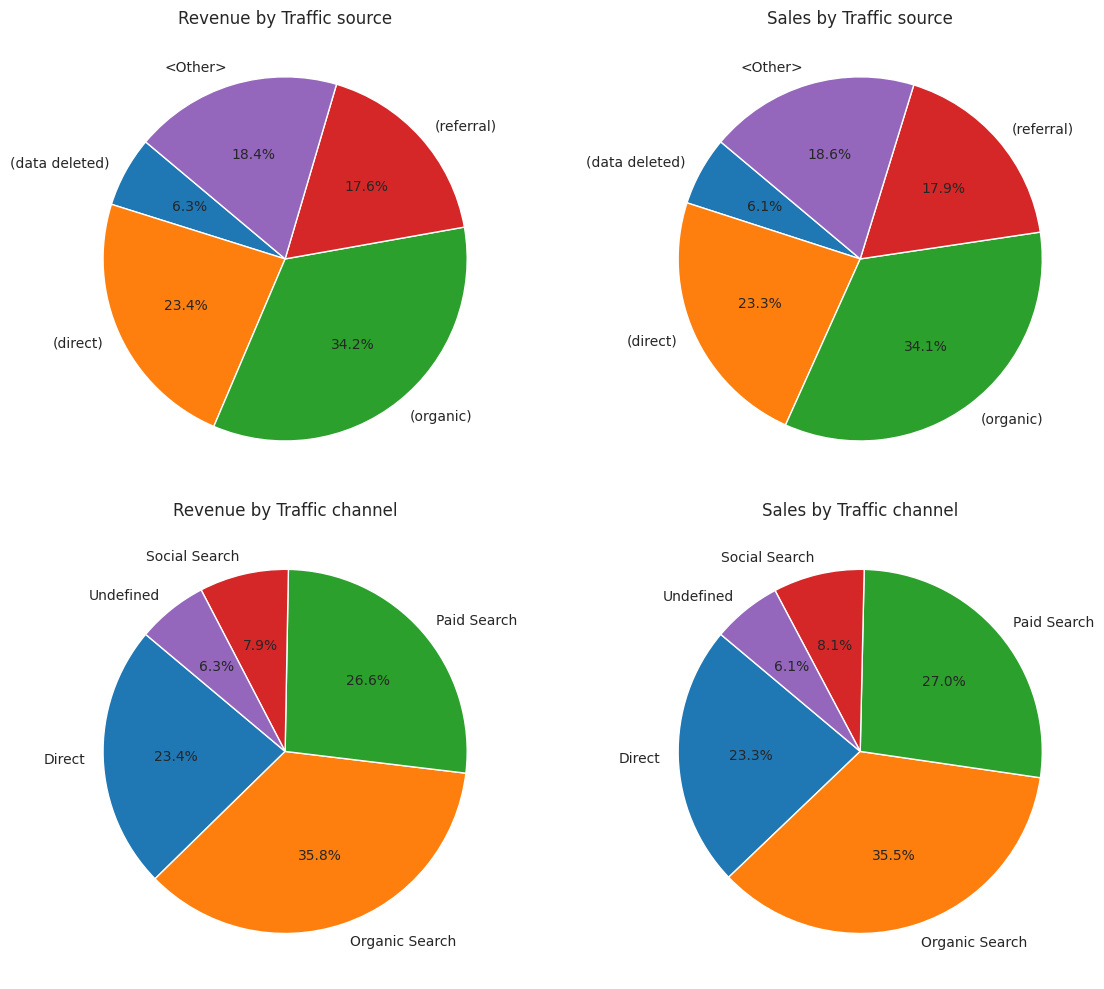

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

source_group = orders_df.groupby("traffic_source")["price"].sum().plot.pie(ax=ax[0, 0], autopct='%1.1f%%', startangle=140)
ax[0, 0].set_title("Revenue by Traffic source")  # Title of the subplot
ax[0, 0].set_ylabel("")


source_group2 = orders_df.groupby("traffic_source")["ga_session_id"].nunique().plot.pie(ax=ax[0, 1], autopct='%1.1f%%', startangle=140)
ax[0, 1].set_title("Sales by Traffic source")  # Title of the subplot
ax[0, 1].set_ylabel("")



mobile_group2 = orders_df.groupby("traffic_channel")["price"].sum().plot.pie(ax=ax[1, 0], autopct='%1.1f%%', startangle=140)
ax[1, 0].set_title("Revenue by Traffic channel")  # Title of the subplot
ax[1, 0].set_ylabel("")



channel_group2 = orders_df.groupby("traffic_channel")["ga_session_id"].nunique().plot.pie(ax=ax[1, 1], autopct='%1.1f%%', startangle=140)
ax[1, 1].set_title("Sales by Traffic channel")  # Title of the subplot
ax[1, 1].set_ylabel("")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

####Just like in the previous analysis of devices, the distribution of revenue and order count (sales) is nearly identical across traffic sources and channels, which suggests that purchase behavior is consistent across platforms.

####Traffic sources:
Organic - around 34 percent, Direct - 23, < Other > - 18/19, Refferal - 18. There is also a percentage of the deleted data - 6.

####Traffic channels:
Organic Search - 35/36 percent, Direct - 23, Paid Search - 26/27, Social Search - 8. There is also a percentage of the Undefind - 6.


####What this tells us:
There’s no major drop-off or imbalance in how different traffic channels convert to revenue — all channels perform proportionally in both sales volume and monetary value.

The marketing mix is balanced, and there's no overly dependent channel, which is good for sustainability.

Organic traffic (search) is the strongest — likely worth prioritizing in SEO/content strategy.

Some undefined or deleted sources exist — not a huge issue, but should be explored to improve tracking quality.

#Subscriprtion details

In [ ]:
# Number of registered users who confirmed their email.
registered = df[df['account_id'].notnull()]
verified = registered['is_verified'].mean() * 100
print(f"{verified:.2f}% users confirmed email")

71.70% users confirmed email


In [ ]:
# Number of registered users who unsubscribed from the newsletter.
unsubscribed = registered['is_unsubscribed'].mean() * 100
print(f"{unsubscribed:.2f}% users unsubscribed from the newsletter")

16.94% users unsubscribed from the newsletter


In [ ]:
# The difference in sales behavour between subscribed and unsubscribed users.

buyers = registered[registered['price'].notnull()]

comparison = buyers.groupby('is_unsubscribed')['price'].agg(['count', 'sum', 'mean'])
comparison.index = comparison.index.map({0: 'Subscribed', 1: 'Unsubscribed'})
print(comparison)

                 count        sum        mean
is_unsubscribed                              
Subscribed        2334  2150796.9  921.506812
Unsubscribed       447   431721.6  965.820134


In [ ]:
top_countries = registered['country'].value_counts().head(10)
print(top_countries)

country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Spain               536
Taiwan              500
Germany             490
China               490
Italy               386
Name: count, dtype: int64


<ipython-input-38-3351461859>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


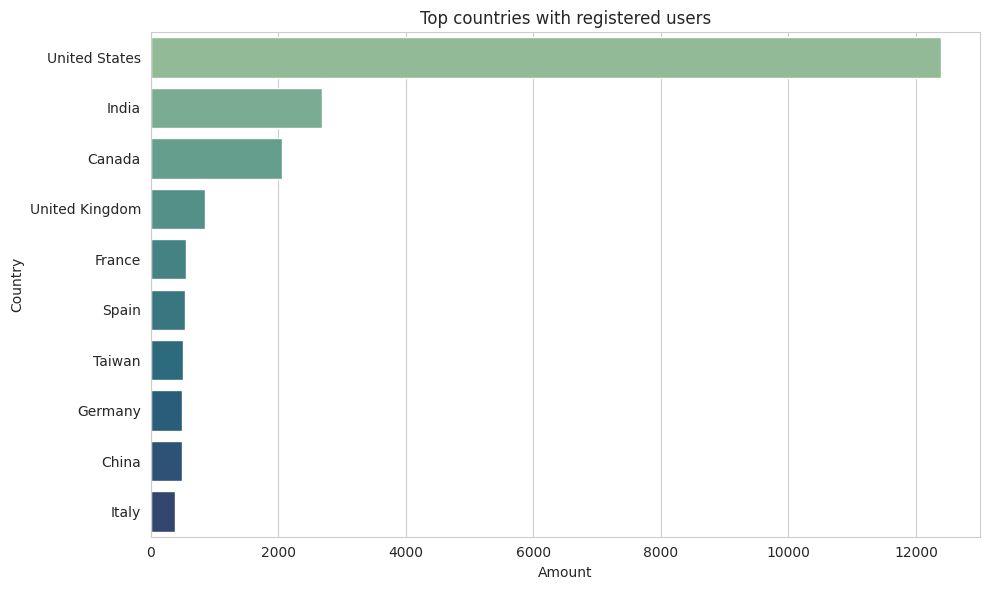

In [ ]:
#top countries with registered users
top_countries = registered['country'].value_counts().head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top countries with registered users')
plt.xlabel('Amount')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

1. Email Confirmation Rate: 71.7%
This is a strong confirmation rate, suggesting that most users who register are legitimate and follow through with verification. Also, our onboarding or email verification flow works well.

2. Unsubscribed from Newsletter: 16.94%
This means around 83% of users remain subscribed, which is a good result. Also, we can make a conclusion, that our emails are not annoying or irrelevant.

If this rate grows, it may indicate poor content quality or overcommunication.

3. Sales Comparison: Subscribed vs. Unsubscribed

This tells us that most of the revenue comes from subscribed users (as expected, since they’re the majority).

However, unsubscribed users have slightly higher average order value, which may suggest:

They’re more decisive/buy once and unsubscribe.

They could be sensitive to marketing emails but still valuable customers.

4. Top Countries by Registered Users

The USA is our dominant market — we may want to localize or personalize messaging for the USA users.

India, Canada, and the UK follow — might indicate growth potential or regional marketing effectiveness.



#Conversion of registered users

In [ ]:
buyers2 = df[(df['account_id'].notnull()) & (df['price'].notnull())]
conversion_rate = buyers['account_id'].nunique() / registered['account_id'].nunique()
print(f"Total coversion: {conversion_rate:.2%}")

Total coversion: 9.95%


This means that around 1 in every 10 registered users made a purchase.

For expensive or complex products, ~10% can be decent. For more common consumer products, you’d usually expect a higher conversion.

A 9.95% conversion rate means there’s a lot of room to grow — especially through onboarding, product engagement, email campaigns, and retargeting.



#Sales and revenue dynamic

##Total sales and revenue by date

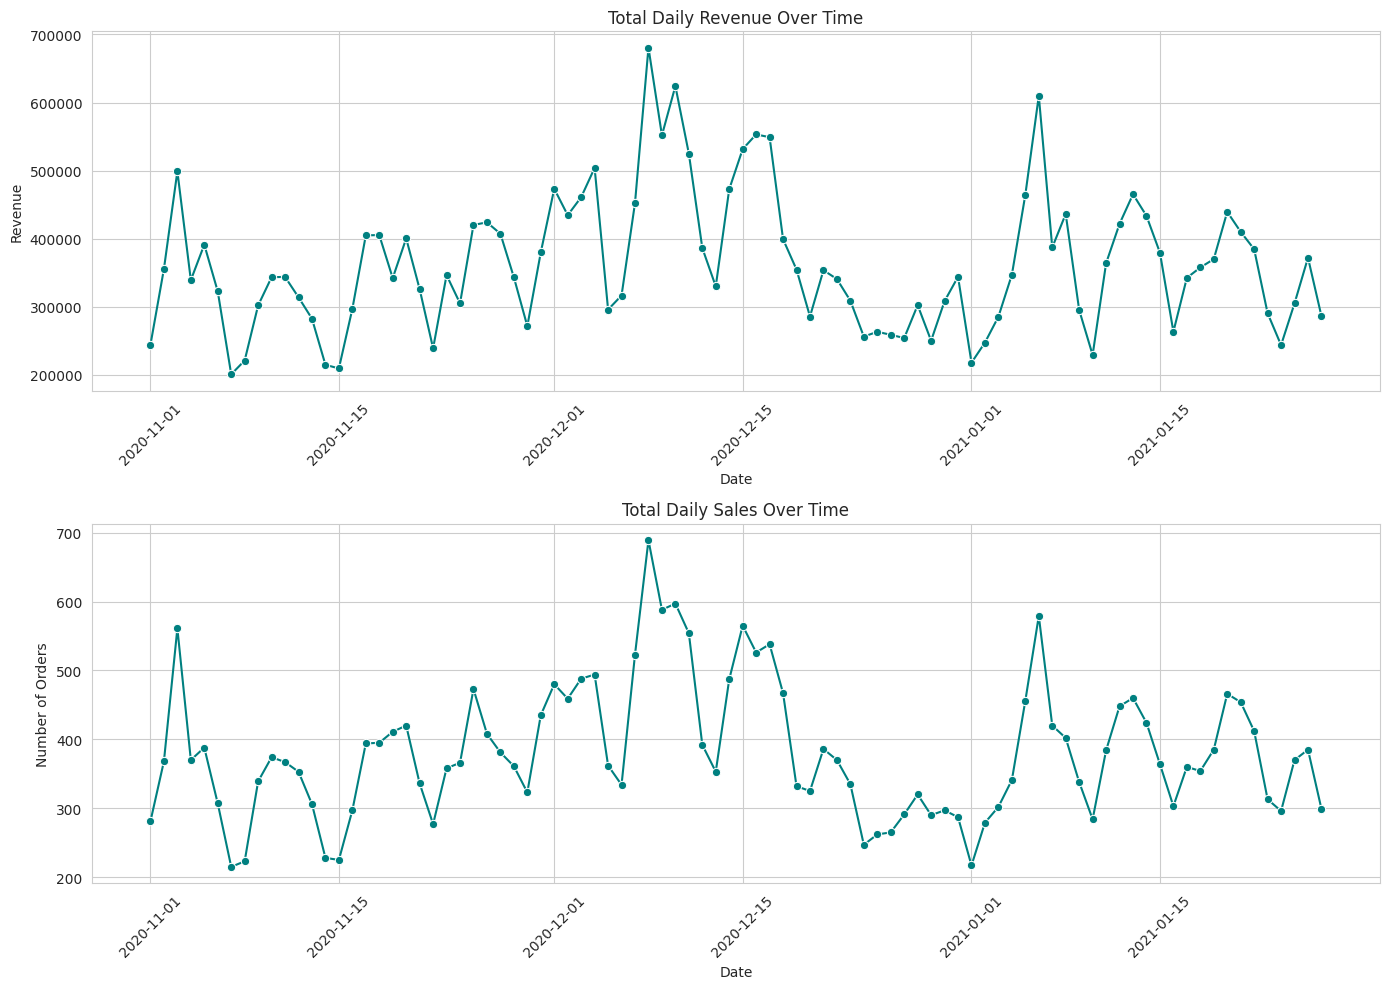

In [ ]:
daily_revenue = df[df['price'].notnull()].groupby('session_date')['price'].sum().reset_index()
daily_sales = df[df['price'].notnull()].groupby('session_date')['ga_session_id'].nunique().reset_index()

# Plots
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
sns.lineplot(data=daily_revenue, x='session_date', y='price', marker='o', color='teal', ax=ax[0])
ax[0].set_title("Total Daily Revenue Over Time")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Date")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
sns.lineplot(data=daily_sales, x='session_date', y='ga_session_id', marker='o', color='teal', ax=ax[1])
ax[1].set_title("Total Daily Sales Over Time")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Date")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


We can clearly see a repeating pattern of peaks and drops. This strongly suggests weekly seasonality, likely influenced by consumer behavior (e.g., more purchases on weekends or specific weekdays).

There are significant spikes in both revenue and sales around:

Late November — likely tied to Black Friday / Cyber Monday promotions.

Mid-December — likely due to holiday shopping (e.g., pre-Christmas).

These peaks are not as prominent in January, indicating seasonal shopping is a strong driver.

More details.
1. Revenue and sales follow a similar pattern
The trends in both revenue and number of orders are closely aligned. This indicates that average order values are relatively stable. Occasional small divergences (e.g., a sharper spike in revenue) may point to a few high-value purchases on those days.

2. Sales peaks appear consistently in the first half of each month
Across November, December, and January, we observe regular surges in sales during the first 10–15 days of each month. This may be due to:

Paydays (many people receive salaries at the start of the month)

Marketing campaigns or promotions timed early in the month


3. December shows a second major peak mid-month
Likely due to holiday shopping (Christmas or other seasonal presents)
Also, there are good results at the end of November - the beginning of December, which might be connected to the "Black Friday" sales.

4. Post-peak drops are common
After each spike, both sales and revenue typically dip. This pattern suggests concentrated buying behavior, followed by a cooldown period — a natural post-promotion or post-payday decline.

Possible Business Insights
* Plan campaigns early in the month: Since user activity spikes early, aligning promotions with these periods could maximize impact.

* Holiday effect: December's mid-month spike suggests strong responsiveness to seasonal events — important for planning next year's campaigns.

* Stable order value: With revenue and sales rising together, there's no strong evidence that basket size varies wildly — users tend to spend similar amounts per order.

##Sales and revenue by continents and date


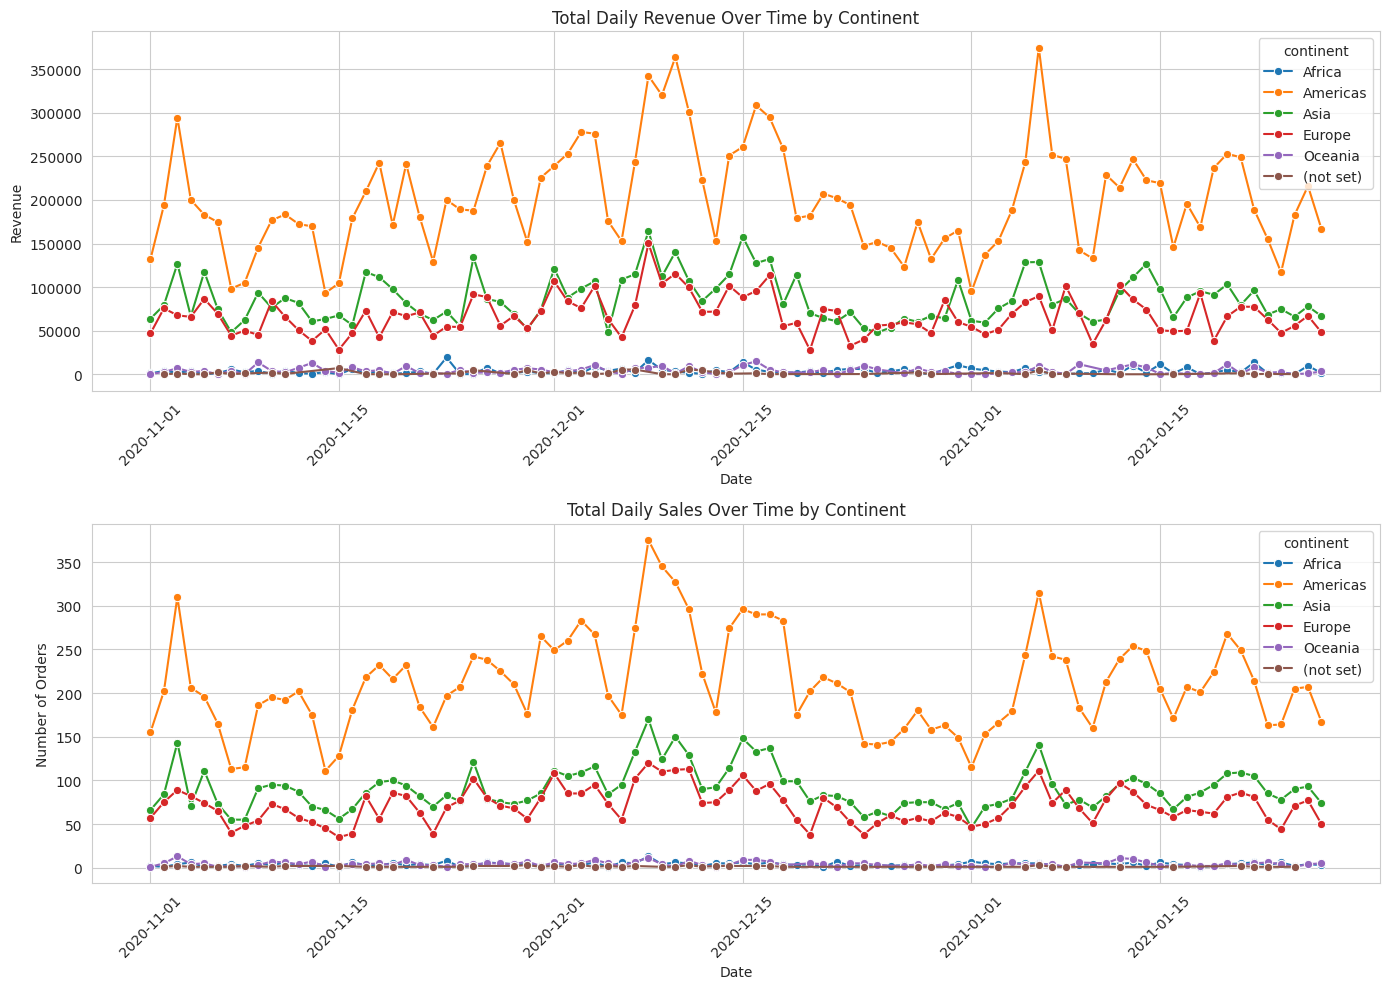

In [ ]:
# Group by session_date and continent for both revenue and sales
daily_revenue1 = df[df['price'].notnull()].groupby(['session_date', 'continent'])['price'].sum().reset_index()
daily_sales1 = df[df['price'].notnull()].groupby(['session_date', 'continent'])['ga_session_id'].nunique().reset_index()

sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
sns.lineplot(data=daily_revenue1, x='session_date', y='price', hue="continent", marker='o', ax=ax[0])
ax[0].set_title("Total Daily Revenue Over Time by Continent")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Date")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
sns.lineplot(data=daily_sales1, x='session_date', y='ga_session_id', hue="continent", marker='o', ax=ax[1])
ax[1].set_title("Total Daily Sales Over Time by Continent")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Date")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


What can we see?

1. Americas dominate:

The orange line (Americas) consistently shows the highest numbers across all dates.

Indicates a strong and possibly mature market presence.

2. Asia and Europe are mid-tier performers:

Asia (green) and Europe (red) show moderate and relatively similar performance.

Some spikes indicate occasional sales surges (e.g., December and early January), possibly related to holidays or marketing events.

3. Africa, Oceania, and (not set) contribute minimally:

Africa (blue), Oceania (purple), and (not set) (brown) have very low and stable revenue values.

These lines mostly remain under 10,000, with occasional spikes from Africa.

Could indicate either smaller markets or underdeveloped sales channels.

4. Volatility and Seasonality:

Americas and Asia show clear volatility, possibly tied to specific campaigns, events, or seasonality (e.g., pre-Christmas spikes).

The increase in numbers in December and early January for most regions might correlate with holiday shopping seasons.

5. Business Insights & Recommendations:

Investigate causes of revenue spikes—campaigns, holidays, etc.—to replicate successful patterns.

Improve data collection processes to reduce "(not set)" entries and enhance clarity.

##Sales and revenue by traffic channels,resources and date

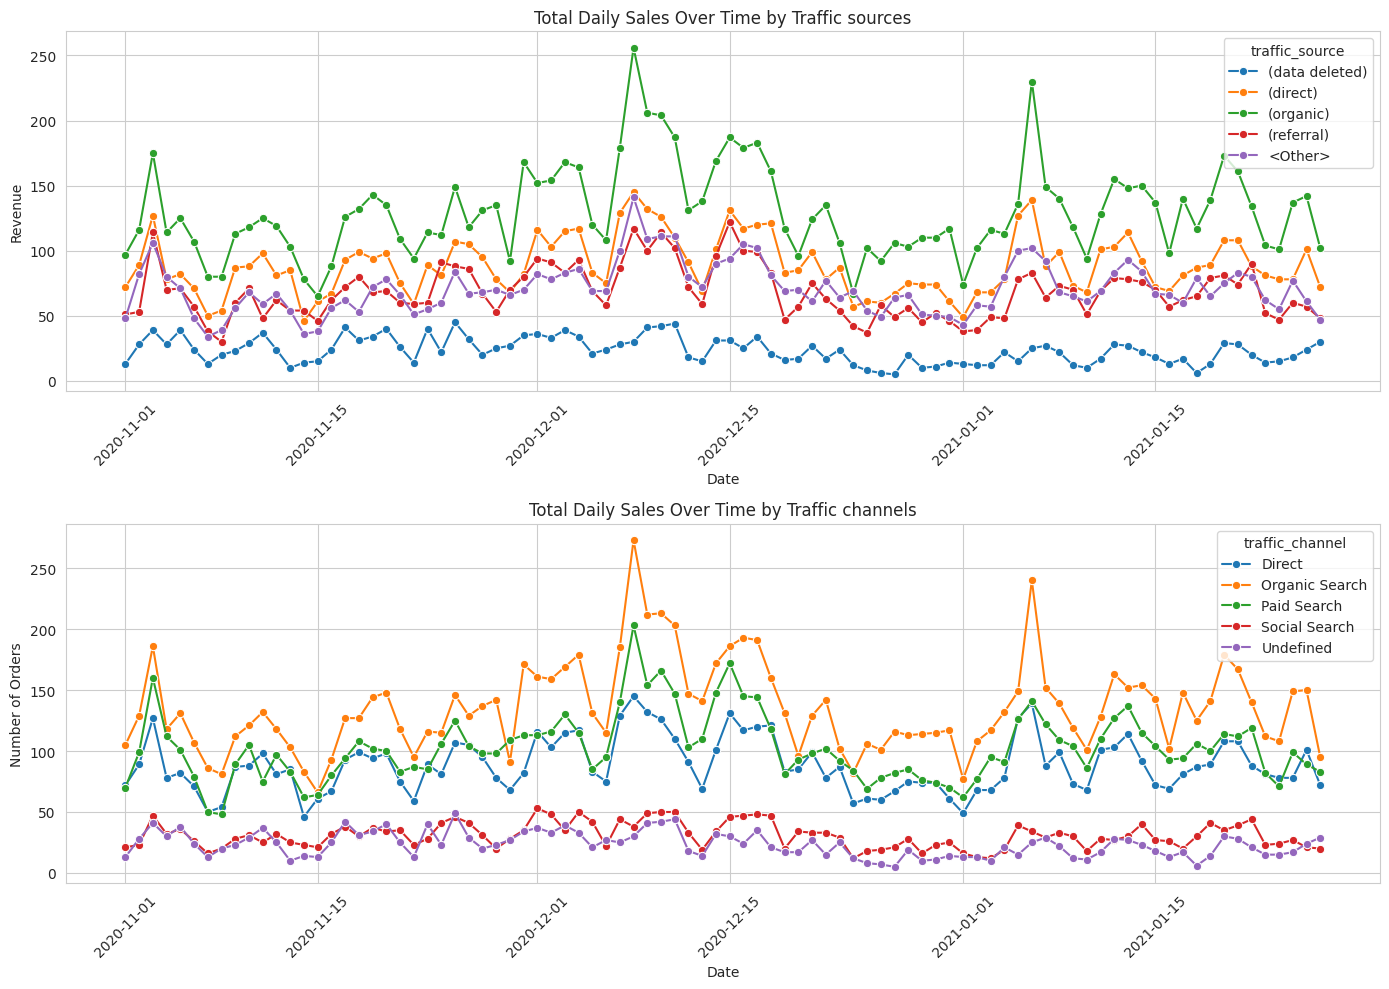

In [ ]:
# Group by session_date and traffic sources/channels for both sales
daily_sales2 = df[df['price'].notnull()].groupby(['session_date', 'traffic_source'])['ga_session_id'].nunique().reset_index()
daily_sales3 = df[df['price'].notnull()].groupby(['session_date', 'traffic_channel'])['ga_session_id'].nunique().reset_index()

sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
sns.lineplot(data=daily_sales2, x='session_date', y='ga_session_id', hue="traffic_source", marker='o', ax=ax[0])
ax[0].set_title("Total Daily Sales Over Time by Traffic sources")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Date")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
sns.lineplot(data=daily_sales3, x='session_date', y='ga_session_id', hue="traffic_channel", marker='o', ax=ax[1])
ax[1].set_title("Total Daily Sales Over Time by Traffic channels")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Date")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. The first chart shows "Total Daily Sales Over Time by Traffic Channels"
What can we see?

Organic Search is the dominant channel, showing frequent high spikes.

Direct and Paid Search contribute significantly but more erratically.

Social and Undefined sources have relatively minor impact on overall sales.

There is a consistent pattern of weekly peaks and troughs, suggesting sales spikes on certain days of the week (likely weekends or promotions).

2. The second chart shows "Total Daily Sales Over Time by Traffic Sources"
What can we see?

Organic traffic is the clear leader in revenue generation, not just in volume but consistency.

Referral and <other> occasionally contribute significant revenue spikes.

(data deleted) shows minimal revenue impact and may not be valuable for future strategies unless clarified.

3. More about the correlation of the results with dates:

I noticed that sales and revenue go up once a week, maybe on weekends or Fridays. Could be when people are more active or when ads are sent out.

Big spikes happen around Dec 11–13 and again on Dec 18–21. Probably people shopping for holidays or using payday money.

After Dec 25, sales and revenue drop a lot. Makes sense since most people are done shopping.

There's a small bump around Dec 29–30—maybe people using gift cards or buying things on sale.

Overall, sales and revenue seem to follow a clear pattern: more activity mid-month and before holidays, then a slowdown after.

##Sales and revenue by devices and date

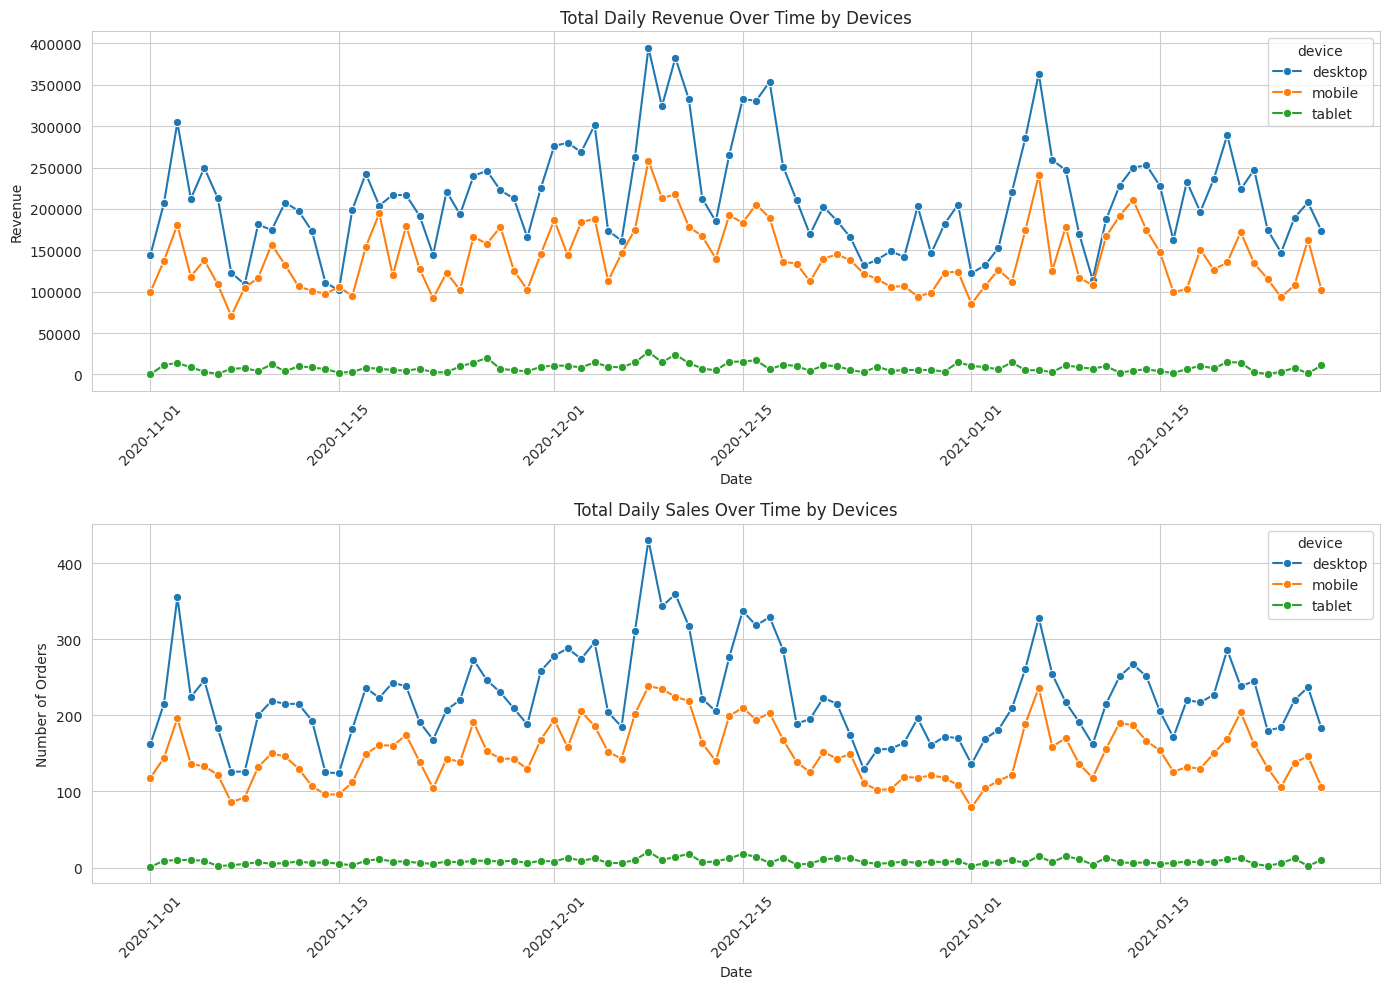

In [ ]:
# Group by session_date and devices for both revenue and sales
daily_revenue1 = df[df['price'].notnull()].groupby(['session_date', 'device'])['price'].sum().reset_index()
daily_sales1 = df[df['price'].notnull()].groupby(['session_date', 'device'])['ga_session_id'].nunique().reset_index()

sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Revenue
sns.lineplot(data=daily_revenue1, x='session_date', y='price', hue="device", marker='o', ax=ax[0])
ax[0].set_title("Total Daily Revenue Over Time by Devices")
ax[0].set_ylabel("Revenue")
ax[0].set_xlabel("Date")
ax[0].tick_params(axis='x', rotation=45)

# Units Sold
sns.lineplot(data=daily_sales1, x='session_date', y='ga_session_id', hue="device", marker='o', ax=ax[1])
ax[1].set_title("Total Daily Sales Over Time by Devices")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Date")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* Device-Level Insights

1. Desktop
Dominates both revenue and order count.

Peaks are very pronounced, suggesting desktop users make more frequent and higher-value purchases.

This could imply that more serious/intended purchases come from desktop.

2. Mobile
Fairly consistent pattern, with smaller peaks.

Trailing behind desktop but still shows seasonal bumps.

Mobile is likely used more for browsing or spontaneous purchases, less for large orders.

3. Tablet
Flat line, minimal contribution.

Could be:

A niche user base.

Or tablet users rarely convert into purchases.


* Date-Specific Patterns

1. Weekly rhythm: Noticeable up-down movements happen regularly — this is classic weekday/weekend fluctuation.

2. Biggest spikes:

Around 2020-11-27 to 2020-12-01 — very likely Black Friday & Cyber Monday.

Around 2020-12-15 to 2020-12-20 — just before Christmas.

Early January has lower performance — possibly due to post-holiday slowdown.

* Conclusions:

Desktop is the primary driver of revenue, suggesting it deserves more attention.

Seasonality is strong — we should consider time-based targeting for future campaigns (e.g., extra campaigns in late November/December).

Tablet audience is minimal — might not need dedicated focus.

###General conclusions on sales dynamics:

1. Sales Go Up and Down in a Predictable Way
There's a really clear weekly pattern in the charts — sales and revenue spike on the same days every week. Probably weekends or Fridays.
Also, there's a regular jump in the first 10–15 days of each month, which might be related to paydays or early-month promotions.

Biggest peaks are:

End of November – definitely Black Friday/Cyber Monday.

Mid-December – most likely people buying Christmas presents.

A smaller bump right before New Year, maybe from gift cards or sales.

After that, sales drop — so it’s clear people shop in bursts, then take a break.

2. Americas Are the Strongest Market
The Americas are clearly the top region in both sales and revenue — super consistent and always ahead.

Asia and Europe are in the middle — sometimes they have big spikes too, especially around holidays.
Africa and Oceania don’t contribute much — the lines are low, with only a few small jumps.

Also, there's a “(not set)” region in the data — could be bad data tracking.

3. Organic Search Is the Main Sales Driver
From the channels chart:

Organic Search is always performing well — this means people are finding the site on their own (via Google etc.).

Direct and Paid Search show random high points, probably from campaigns.

Social and other sources don’t bring much — maybe something to improve later.

In short, SEO works well, and ads bring bursts when used.

4. Desktop = Serious Shopping
When looking at devices:

Desktops bring in the most money and orders. Looks like people who shop on desktops are ready to buy and spend more.

Mobiles are steady but not as strong. People may be just browsing or doing small purchases.

Tablets barely show up — not much happening there.

5. Revenue and Sales Grow Together
In most charts, revenue and number of orders follow the same trend. That means the average order size stays about the same.
Sometimes revenue spikes more than orders — could be because of a few expensive purchases, but not a big trend.

* Key Moments

People shop more at the start of the month and around holidays.

Black Friday and Christmas are massive — campaigns here clearly work.

The US and Americas lead, but there’s potential in Asia and Europe.

SEO is doing great, and ads can create good bursts.

Desktops bring real sales, so mobile might need follow-up tactics.

Order sizes are pretty stable, so increasing volume (number of orders) is a good goal.

* What This Could Mean for the Business

Plan the campaigns around early-month and holiday periods.

Focus more on desktop users, but don’t ignore mobile.

Keep doing organic SEO, but try more with social or referral too.

Clean up tracking to fix that “not set” region.

Maybe test new markets where there are small but growing spikes (Africa, Oceania).



#Merged tables

##1. This table shows the number of sessions by traffic channels and device types (if the value of a field is unknown, it is ignored)

In [ ]:
# Filter so that only known values are counted
new_df = df.dropna(subset=["traffic_channel", "device", "ga_session_id"])

# Створюємо зведену таблицю
pivot_table = pd.pivot_table(new_df, values="ga_session_id", index="traffic_channel", columns="device", aggfunc="nunique")

print(pivot_table)


device           desktop  mobile  tablet
traffic_channel                         
Direct             47825   31745    1812
Organic Search     72622   49014    2789
Paid Search        55167   37034    2140
Social Search      16288   10988     638
Undefined          12527    8486     470


##2. This table shows total sales (revenue) by product category (top 10 categories) in different countries (top 5 countries)

In [ ]:
# Group and count sales
new_df2 = orders_df.groupby(["product_category", "country"])["price"].sum().reset_index()

# Top-10 categories
top_categories = (new_df2.groupby("product_category")["price"].sum().sort_values(ascending=False).head(10).index)

# Tp-5 countries
top_countries = (new_df2.groupby("country")["price"].sum().sort_values(ascending=False).head(5).index)

# Filter
filtered = new_df2[new_df2["product_category"].isin(top_categories) & new_df2["country"].isin(top_countries)]

# A pivot table
pivot_table = pd.pivot_table(filtered, values="price", index="product_category", columns="country", aggfunc="sum", fill_value=0)

print(pivot_table)


country                             Canada    France     India  \
product_category                                                 
Bar furniture                      51724.0   11199.0   57657.0   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Chairs                            417740.8  134029.4  544309.2   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Children's furniture               30264.0   14258.0   39177.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Sofas & armchairs                 692427.5  187735.0  788430.0   
Tables & desks                    132678.0   42299.0  186157.5   

country                           United Kingdom  United States  
product_category                                                 
Bar furniture                            22103.0       330805.0  
Beds     

##3.This table shows total sales by device in different countries. Gives an understanding of which countries use more mobile and which use more desktop. This is useful for advertising and UX/UI adaptations.

In [ ]:
sales_by_device_country = pd.pivot_table(df[df['price'].notnull()],values='price', index='device', columns='country', aggfunc='sum')
print(sales_by_device_country)

country  (not set)  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
device                                                                         
desktop   166595.8   8240.0  14807.0    54130.8   2524.0   209365.7  45320.8   
mobile     93021.5   5180.0   8479.0    31592.0   4689.4    98896.5  41137.0   
tablet      7230.0    595.0      NaN     1925.0      NaN     7630.0   5031.0   

country  Azerbaijan  Bahamas  Bahrain  ...  Trinidad & Tobago  Tunisia  \
device                                 ...                               
desktop      4252.0    524.0    132.0  ...             4577.0  10551.0   
mobile       6368.0   1887.0   5865.0  ...             2390.0   4111.0   
tablet        700.0      NaN      NaN  ...                NaN      NaN   

country    Turkey   Ukraine  United Arab Emirates  United Kingdom  \
device                                                              
desktop  168486.4  189378.0               79962.0        546160.9   
mobile   128093.1  10

##4. This table shows average check by traffic channel. Shows which channels bring in paying users (for example, do those who came from Email spend more than those from Social).

In [ ]:
avg_check_by_channel = pd.pivot_table(df[df['price'].notnull()], values='price', index='traffic_channel', aggfunc='mean')
print (avg_check_by_channel)


                      price
traffic_channel            
Direct           960.887615
Organic Search   959.076554
Paid Search      941.279518
Social Search    932.292231
Undefined        971.588635


#Statistical analysis of connections

##Correlation between sessions and revenue

In [ ]:
#Finding the number of sessions and total sales for each date.
daily_statistics = df[df['price'].notnull()].groupby('session_date').agg({
    'ga_session_id': 'nunique',
    'price': 'sum'
}).reset_index()

daily_statistics.rename(columns={'ga_session_id': 'session_count', 'price': 'total_revenue'}, inplace=True)
print(daily_statistics)


   session_date  session_count  total_revenue
0    2020-11-01            281       244292.5
1    2020-11-02            368       355506.8
2    2020-11-03            561       498979.6
3    2020-11-04            370       339187.1
4    2020-11-05            388       391276.6
..          ...            ...            ...
83   2021-01-23            313       290605.5
84   2021-01-24            296       243818.4
85   2021-01-25            370       305089.3
86   2021-01-26            385       372057.3
87   2021-01-27            299       286340.7

[88 rows x 3 columns]


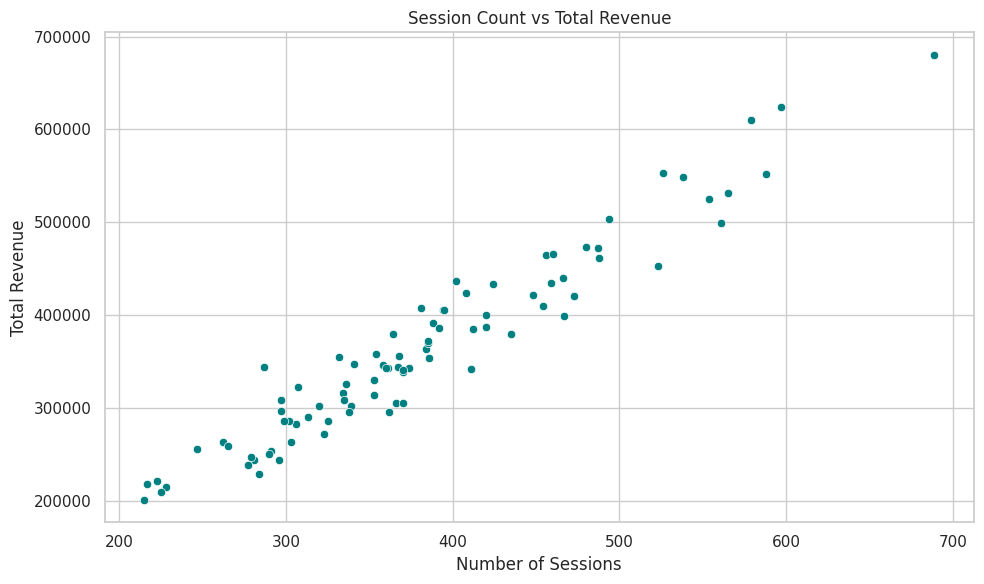

In [ ]:
#A visualization to see the connection between these metrics
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(data=daily_statistics, x='session_count', y='total_revenue', color='teal')

plt.title('Session Count vs Total Revenue')
plt.xlabel('Number of Sessions')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [ ]:
#Finding the appropriate correlation coefficient and analyze its statistical significance.
from scipy.stats import pearsonr

corr, p_value = pearsonr(daily_statistics['session_count'], daily_statistics['total_revenue'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.5f}")


Pearson correlation: 0.964, p-value: 0.00000


There’s a very strong positive relationship between the number of sessions and total revenue. It means, when more users visit (more sessions), we almost always see higher sales.

This suggests that traffic volume is a key driver of revenue — boosting visits can directly boost earnings.

If we want to grow revenue, we should focus on increasing the number of sessions — e.g., through marketing, SEO, or email campaigns — because almost every increase in visits leads to more sales.



##Correlation between sales from different continents (top-3)

In [ ]:
top_continents = (df[df['price'].notnull()].groupby('continent')['price'].sum().sort_values(ascending=False).head(3).index)

sales_by_continent = (df[df['continent'].isin(top_continents) & df['price'].notnull()].groupby(['session_date', 'continent'])['price'].sum().reset_index().pivot(index='session_date', columns='continent', values='price'))
print(sales_by_continent)



continent     Americas      Asia   Europe
session_date                             
2020-11-01    132002.5   63823.0  46908.0
2020-11-02    193861.0   79370.0  75710.8
2020-11-03    294529.8  126737.8  67692.0
2020-11-04    200009.5   66602.0  65915.0
2020-11-05    182988.2  117608.4  86540.0
...                ...       ...      ...
2021-01-23    155342.9   68543.0  62883.6
2021-01-24    116989.4   74801.2  47534.8
2021-01-25    182548.1   66215.2  55621.0
2021-01-26    215973.0   77995.2  67143.1
2021-01-27    166735.5   66783.1  48156.1

[88 rows x 3 columns]


In [ ]:
#Checking correlation
pairs = sales_by_continent.columns.to_list()

for i in range(len(pairs)):
    for j in range(i+1, len(pairs)):
        col1 = pairs[i]
        col2 = pairs[j]
        series1 = sales_by_continent[col1]
        series2 = sales_by_continent[col2]

        r, p = pearsonr(series1, series2)
        print(f"{col1} vs {col2} → correlation: {r:.3f}, p-value: {p:.5f}")


Americas vs Asia → correlation: 0.692, p-value: 0.00000
Americas vs Europe → correlation: 0.670, p-value: 0.00000
Asia vs Europe → correlation: 0.668, p-value: 0.00000


We can see that sales on the top 3 continents (Americas, Asia, and Europe) are quite strongly correlated with each other. The correlation coefficients are all around 0.67–0.69, which shows a moderate to strong positive relationship. The p-values are all  0.00000, which means the results are statistically significant.

So, when there’s a spike or drop in sales in one region, it often happens in the others too. This probably means there are shared global factors like holidays, campaigns, or consumer behavior trends affecting all these regions at once. It suggests that international campaigns might be especially effective.

##Correlation between sales from different traffic channels

In [ ]:
sales_by_channel = (df[df['price'].notnull()].groupby(['session_date', 'traffic_channel'])['price'].sum().reset_index().pivot(index='session_date', columns='traffic_channel', values='price'))
print(sales_by_channel)

traffic_channel    Direct  Organic Search  Paid Search  Social Search  \
session_date                                                            
2020-11-01        54669.5         95112.0      64688.0        25078.0   
2020-11-02        81561.5        127746.5     104780.8        16843.0   
2020-11-03       102909.5        182521.9     152641.3        27652.5   
2020-11-04        79683.6        117067.1     100332.0        24257.4   
2020-11-05        83367.6        122938.4     107648.0        41693.2   
...                   ...             ...          ...            ...   
2021-01-23        88714.4         90686.0      73075.1        23095.0   
2021-01-24        58644.2         93413.6      59018.0        20596.1   
2021-01-25        67844.0        136178.6      66775.7        23809.0   
2021-01-26       109355.6        140921.2      91437.5        17008.0   
2021-01-27        70423.1         92921.1      80869.5        16282.0   

traffic_channel  Undefined  
session_date         

In [ ]:
#Checking correlation
pairs = sales_by_channel.columns.to_list()

for i in range(len(pairs)):
    for j in range(i+1, len(pairs)):
        col1 = pairs[i]
        col2 = pairs[j]
        series1 = sales_by_channel[col1]
        series2 = sales_by_channel[col2]

        r, p = pearsonr(series1, series2)
        print(f"{col1} vs {col2} → correlation: {r:.3f}, p-value: {p:.5f}")

Direct vs Organic Search → correlation: 0.760, p-value: 0.00000
Direct vs Paid Search → correlation: 0.724, p-value: 0.00000
Direct vs Social Search → correlation: 0.462, p-value: 0.00001
Direct vs Undefined → correlation: 0.424, p-value: 0.00004
Organic Search vs Paid Search → correlation: 0.808, p-value: 0.00000
Organic Search vs Social Search → correlation: 0.434, p-value: 0.00002
Organic Search vs Undefined → correlation: 0.435, p-value: 0.00002
Paid Search vs Social Search → correlation: 0.452, p-value: 0.00001
Paid Search vs Undefined → correlation: 0.430, p-value: 0.00003
Social Search vs Undefined → correlation: 0.359, p-value: 0.00059


Here it is seen that some channels have a strong correlation, while others - moderate.

1. Strong correlations:

Organic Search vs Paid Search

Direct vs Organic Search

Direct vs Paid Search

These channels tend to have similar daily sales dynamics. When sales go up on one — they often go up on the others too.

These channels might be reacting to shared factors like overall demand spikes, coordinated marketing efforts, or promotions affecting all major acquisition types.

2. Moderate correlations:

Most pairs involving Social Search and Undefined fall into moderate range.

These channels move somewhat in sync with bigger channels, but not as closely.

3. Statistical significance:

All p-values are below 0.001, so all correlations are statistically significant.
This means these patterns are unlikely to be due to random chance.

4. Conclusions:

Direct, Organic, and Paid Search channels show very similar sales trends. If one performs well or poorly, the others likely follow — so we can monitor them together and expect similar reactions to campaigns or seasonality.

Social and Undefined channels behave differently. You may want to treat them separately in campaign planning or analysis — especially Social, which could be more event- or influencer-driven.



##Correlation between sales between top-5 product categories

In [ ]:
top_categories = (df[df['price'].notnull()].groupby('product_category')['price'].sum().sort_values(ascending=False).head(5).index)

sales_by_category = (df[df['product_category'].isin(top_categories) & df['price'].notnull()].groupby(['session_date', 'product_category'])['price'].sum().reset_index().pivot(index='session_date', columns='product_category', values='price'))
print(sales_by_category)

product_category     Beds  Bookcases & shelving units  Cabinets & cupboards  \
session_date                                                                  
2020-11-01        14041.0                     36701.0               13591.5   
2020-11-02        79683.5                     40979.0               21623.0   
2020-11-03        66219.5                     64360.1               33555.5   
2020-11-04        48939.0                     35719.8               19266.0   
2020-11-05        23449.0                     40998.8               29235.0   
...                   ...                         ...                   ...   
2021-01-23        37116.0                     29862.7               26068.0   
2021-01-24        23294.0                     25396.0               23664.5   
2021-01-25        47303.5                     25919.6               33028.0   
2021-01-26        69894.5                     39119.2               20218.0   
2021-01-27        43080.0                     33874.

In [ ]:
#Checking correlation
pairs = sales_by_category.columns.to_list()

for i in range(len(pairs)):
    for j in range(i+1, len(pairs)):
        col1 = pairs[i]
        col2 = pairs[j]
        series1 = sales_by_category[col1]
        series2 = sales_by_category[col2]

        r, p = pearsonr(series1, series2)
        print(f"{col1} vs {col2} → correlation: {r:.3f}, p-value: {p:.5f}")

Beds vs Bookcases & shelving units → correlation: 0.593, p-value: 0.00000
Beds vs Cabinets & cupboards → correlation: 0.515, p-value: 0.00000
Beds vs Chairs → correlation: 0.554, p-value: 0.00000
Beds vs Sofas & armchairs → correlation: 0.535, p-value: 0.00000
Bookcases & shelving units vs Cabinets & cupboards → correlation: 0.539, p-value: 0.00000
Bookcases & shelving units vs Chairs → correlation: 0.637, p-value: 0.00000
Bookcases & shelving units vs Sofas & armchairs → correlation: 0.666, p-value: 0.00000
Cabinets & cupboards vs Chairs → correlation: 0.573, p-value: 0.00000
Cabinets & cupboards vs Sofas & armchairs → correlation: 0.658, p-value: 0.00000
Chairs vs Sofas & armchairs → correlation: 0.578, p-value: 0.00000


1. The results show that all pairs of categories have a moderate positive correlation.

For example, the correlation between Beds and Bookcases & shelving units is 0.593, between Bookcases & shelving units and Sofas & armchairs it is 0.666, and between Chairs and Sofas & armchairs it is 0.578.

All the correlations are between 0.51 and 0.67, which means the categories tend to follow similar sales patterns.

2. Also, all p-values are less than 0.00001, which means the relationships are statistically significant — they are very unlikely to be caused by random chance.

So when the sales of one category go up, the sales of another category also tend to go up. This might be because of seasonal trends, promotions, or the fact that people often buy several types of furniture together, like a chair and a sofa or a bed and a cupboard.

So, based on the data, I can say that the sales of the top 5 product categories are correlated, and this connection is statistically significant. This could be useful for marketing and inventory planning — for example, promoting certain categories together or predicting demand more accurately.

##Correlation between sales from different devices.

In [ ]:
sales_by_device = (df[df['price'].notnull()].groupby(['session_date', 'device'])['price'].sum().reset_index().pivot(index='session_date', columns='device', values='price'))
print(sales_by_device)

device         desktop    mobile   tablet
session_date                             
2020-11-01    144445.0   99698.5    149.0
2020-11-02    206727.3  137269.5  11510.0
2020-11-03    304473.8  180602.8  13903.0
2020-11-04    212227.7  118324.4   8635.0
2020-11-05    249682.0  138256.0   3338.6
...                ...       ...      ...
2021-01-23    174769.3  115462.2    374.0
2021-01-24    147218.2   93233.2   3367.0
2021-01-25    189441.7  107902.6   7745.0
2021-01-26    207834.4  162897.9   1325.0
2021-01-27    173453.5  102042.2  10845.0

[88 rows x 3 columns]


In [ ]:
#Checking correlation
pairs = sales_by_device.columns.to_list()

for i in range(len(pairs)):
    for j in range(i+1, len(pairs)):
        col1 = pairs[i]
        col2 = pairs[j]
        series1 = sales_by_device[col1]
        series2 = sales_by_device[col2]

        r, p = pearsonr(series1, series2)
        print(f"{col1} vs {col2} → correlation: {r:.3f}, p-value: {p:.5f}")

desktop vs mobile → correlation: 0.806, p-value: 0.00000
desktop vs tablet → correlation: 0.538, p-value: 0.00000
mobile vs tablet → correlation: 0.496, p-value: 0.00000



1. We can see that desktop vs mobile a strong correlation.

This means that when desktop sales go up, mobile sales usually go up as well — and vice versa. They tend to follow the same trend over time. This strong relationship might reflect general demand patterns (e.g., big promotions, holidays) that affect all platforms.

2. Desktop vs tablet have moderate positive correlation

There is some connection between desktop and tablet sales, but it's weaker. This suggests that tablet activity may follow similar patterns to desktop, but not always — possibly because tablet usage is more niche or varies by demographic.

3. Mobile vs Tablet have also moderate (borderline weak) correlation

The relationship between mobile and tablet sales is noticeable but weaker. This may indicate that these two devices are used in different ways (e.g., mobile for impulse buys, tablet for browsing or specific use cases), so their trends don’t always match.

4. All p-values are very small (much less than 0.05), these results are statistically significant, meaning the correlations are real and not random.


5. Conclusions:

Desktop and mobile sales are closely linked — they likely respond similarly to campaigns, events, or overall market trends.

Tablet behaves more independently — its correlation with other devices is weaker, so it may require separate analysis or strategy.

##Correlation between sales from different countries (top-5)

In [ ]:
top_countries = (df[df['price'].notnull()].groupby('country')['price'].sum().sort_values(ascending=False).head(5).index)

sales_by_country = (df[df['country'].isin(top_countries) & df['price'].notnull()].groupby(['session_date', 'country'])['price'].sum().reset_index().pivot(index='session_date', columns='country', values='price'))
print(sales_by_country)

country        Canada   France    India  United Kingdom  United States
session_date                                                          
2020-11-01    10689.0   4403.0  18233.0         19433.0       115244.5
2020-11-02    32977.0   5214.0  24811.0         14498.0       145356.0
2020-11-03    33645.5  10644.0  52211.4          9033.0       243143.3
2020-11-04    20374.0    800.0  14027.0          7390.0       161519.5
2020-11-05    27295.6  19962.0  33781.0          9576.0       138650.2
...               ...      ...      ...             ...            ...
2021-01-23    15792.6   3348.0  26379.0          9555.0       122718.3
2021-01-24    16247.0   5701.0  35757.6         13359.0        97533.4
2021-01-25    33474.5   2440.0  36392.0         10607.0       139198.6
2021-01-26    27232.0   7774.0  36047.2         20743.0       168342.0
2021-01-27    13985.0   4255.0  19730.5         17409.0       137544.5

[88 rows x 5 columns]


In [ ]:
#Checking correlation
pairs = sales_by_country.columns.to_list()

for i in range(len(pairs)):
    for j in range(i+1, len(pairs)):
        col1 = pairs[i]
        col2 = pairs[j]
        series1 = sales_by_country[col1]
        series2 = sales_by_country[col2]

        r, p = pearsonr(series1, series2)
        print(f"{col1} vs {col2} → correlation: {r:.3f}, p-value: {p:.5f}")

Canada vs France → correlation: 0.312, p-value: 0.00304
Canada vs India → correlation: 0.372, p-value: 0.00037
Canada vs United Kingdom → correlation: 0.239, p-value: 0.02523
Canada vs United States → correlation: 0.575, p-value: 0.00000
France vs India → correlation: 0.274, p-value: 0.00968
France vs United Kingdom → correlation: 0.173, p-value: 0.10707
France vs United States → correlation: 0.391, p-value: 0.00017
India vs United Kingdom → correlation: 0.349, p-value: 0.00086
India vs United States → correlation: 0.568, p-value: 0.00000
United Kingdom vs United States → correlation: 0.328, p-value: 0.00182


1. We can see that the strongest correlations are with the United States

This suggests that sales trends in the U.S. are closely followed by other countries, especially Canada and India. Likely, these markets respond to global campaigns or seasonality in similar ways.

2. Canada shows moderate correlation with all other countries

Canada seems to follow global sales patterns moderately closely.

3. France vs United Kingdom have correlation = 0.173, p-value = 0.10707

This is the only non-significant correlation (p > 0.05)

Suggests that France and the UK do not follow similar sales patterns, or the relationship is too weak to be meaningful.

4. Most other pairs show weak-to-moderate but significant correlations, which means:

There is some synchronization, but not very strong.

Countries may be affected by shared factors (like major holidays or campaigns), but also have local dynamics.

5. Conclusions:

Sales between countries show mostly weak to moderate positive correlations, with the United States at the center of the strongest relationships — particularly with Canada and India. This suggests that some international markets respond similarly over time, likely due to shared promotions or seasonal trends. However, France and the UK do not appear to have a meaningful correlation, highlighting the importance of considering local differences when analyzing or planning across regions.

#Statistical analysis of differences between groups

##1.Registered vs not registered users

In [ ]:
# Creating a column indicating whether the user is registered
df['is_registered'] = df['account_id'].notna()

# Group by date and registration status
df_grouped = (df[df['price'].notnull()].groupby(['session_date', 'is_registered'])['price'].sum().reset_index())

# Create two samples
sales_registered = df_grouped[df_grouped['is_registered'] == True]['price']
sales_unregistered = df_grouped[df_grouped['is_registered'] == False]['price']



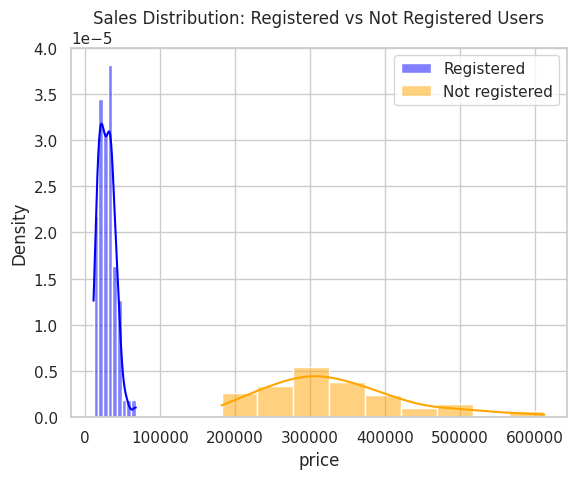

In [ ]:

sns.histplot(sales_registered, kde=True, color='blue', label='Registered', stat='density')
sns.histplot(sales_unregistered, kde=True, color='orange', label='Not registered', stat='density')
plt.legend()
plt.title('Sales Distribution: Registered vs Not Registered Users')
plt.show()


In [ ]:
from scipy.stats import shapiro

shapiro(sales_registered)
shapiro(sales_unregistered)


ShapiroResult(statistic=np.float64(0.9521579282190968), pvalue=np.float64(0.0026183359245325936))

1. According to the graph:

Registered users have a dense concentration around lower prices.

Unregistered users have a wider distribution and higher prices.

2. The Shapiro-Wilk test result:

p-value = 0.0026 < 0.05 — which means the distribution is NOT normal.

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(sales_registered, sales_unregistered, alternative='two-sided')


MannwhitneyuResult(statistic=np.float64(0.0), pvalue=np.float64(2.2159276950123465e-30))

3. The p-value is extremely small (≈ 0), much less than 0.05.

This means the probability that such a difference between the groups occurred by chance is practically zero.

So there is a statistically significant difference between the sales amounts of registered and unregistered users.

2. Possible explanation:

Registered users likely buy more frequently but for smaller amounts.
Unregistered users buy less often but spend more per purchase (this is visible in the graph: "Registered" users are concentrated around lower prices, while "Not registered" have a wider range).

3. Conclusions:

To compare the sales distributions between registered and unregistered users, the Shapiro-Wilk test was conducted and showed that the distributions are not normal (p = 0.0026). Therefore, the non-parametric Mann-Whitney U test was applied.

Test results: U = 0.0, p < 0.0001. This indicates a statistically significant difference between the two groups. Sales differ depending on the user status — registered and unregistered users exhibit significantly different behavior profiles.

##2. Session count by traffic channels

In [ ]:
# Counting number of sessions per date and traffic_channel
sessions_per_channel = df.groupby(['session_date', 'traffic_channel'])['ga_session_id'].nunique().reset_index(name='session_count')


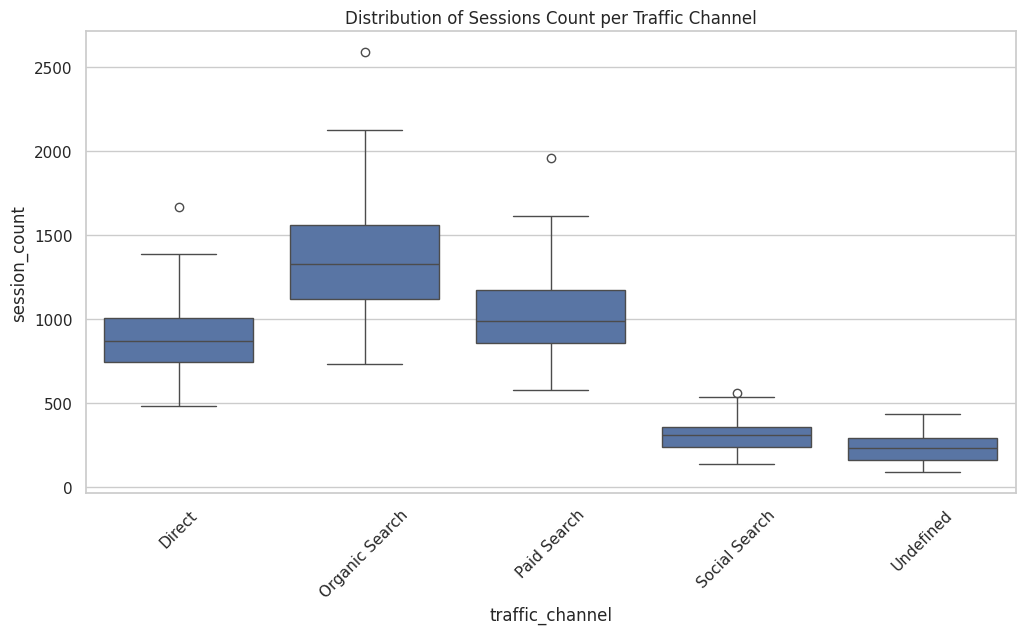

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='traffic_channel', y='session_count', data=sessions_per_channel)
plt.title('Distribution of Sessions Count per Traffic Channel')
plt.xticks(rotation=45)
plt.show()


Organic Search has the highest median and spread.

Direct and Paid Search are more centered but still have some variability.

Social Search and Undefined have the lowest median session counts.

There are outliers in every group.

In [ ]:
from scipy.stats import shapiro, levene

# Normality test per group
for channel in sessions_per_channel['traffic_channel'].unique():
    stat, p = shapiro(sessions_per_channel[sessions_per_channel['traffic_channel'] == channel]['session_count'])
    print(f'{channel}: p-value={p:.4f}')

# Homogeneity of variance
stat, p = levene(*[sessions_per_channel[sessions_per_channel['traffic_channel'] == channel]['session_count']
                  for channel in sessions_per_channel['traffic_channel'].unique()])
print(f'Levene test p-value: {p:.4f}')

Direct: p-value=0.0343
Organic Search: p-value=0.0123
Paid Search: p-value=0.0108
Social Search: p-value=0.1413
Undefined: p-value=0.0546
Levene test p-value: 0.0000


Direct (p = 0.0343) - Significant difference vs. at least one other group.

Organic Search (p = 0.0123) - Significant.

Paid Search (p = 0.0108) - Significant.

Social Search (p = 0.1413) - Not significant.

Undefined (p = 0.0546) - Borderline (not significant at α = 0.05, but close).

In [ ]:
from scipy.stats import kruskal

# Create a list of session_count arrays, one per traffic_channel
groups = [group['session_count'].values
          for _, group in sessions_per_channel.groupby('traffic_channel')]

# Test
stat, p = kruskal(*groups)

print(f'Kruskal-Wallis p-value: {p:.4f}')


Kruskal-Wallis p-value: 0.0000


There are statistically significant differences in session counts among traffic channels (it is confirmed by Kruskal-Wallis test).

Organic Search, Paid Search, and Direct channels show significant differences in session counts (vs other channels).

Social Search and Undefined do not significantly differ in session counts compared to others (or each other).

Variance is not equal across groups, so non-parametric tests like Kruskal-Wallis and Dunn’s post-hoc test are more appropriate here.

##3. Is the proportion of sessions with organic traffic statistically different in Europe and the Americas?

In [ ]:
# Keep only Europe and America
df_filtered = df[df['continent'].isin(['Europe', 'Americas'])].copy()

# Add binary flag: 1 if organic, 0 otherwise
df_filtered['is_organic'] = df_filtered['traffic_channel'] == 'Organic Search'

# Group by continent and count total sessions and organic sessions
new_filtered = df_filtered.groupby('continent').agg(
    total_sessions=('ga_session_id', 'nunique'),
    organic_sessions=('is_organic', 'sum')
).reset_index()

# Calculate non-organic sessions
new_filtered['non_organic_sessions'] = new_filtered['total_sessions'] - new_filtered['organic_sessions']

print(new_filtered)


  continent  total_sessions  organic_sessions  non_organic_sessions
0  Americas          193179             68671                124508
1    Europe           65135             23195                 41940


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of organic sessions
counts = new_filtered['organic_sessions'].values

# Number of observations (total sessions)
nobs = new_filtered['total_sessions'].values

# Perform 2-proportion z-test
stat, p = proportions_ztest(count=counts, nobs=nobs)

print(f'Z-statistic: {stat:.4f}')
print(f'p-value: {p:.4f}')


Z-statistic: -0.2895
p-value: 0.7722


A two-proportion Z-test is conducted to compare the share of sessions from organic traffic between Europe and the Americas.
The result (Z = -0.29, p = 0.7722) indicates that there is no statistically significant difference in the proportion of organic sessions between the two regions.

Therefore, we can conclude that organic traffic behaves similarly across Europe and the Americas in terms of its relative share of sessions.



##4. Is there a monotonic relationship between number of sessions per day and average purchase price per day?

In [ ]:
daily_data = df.groupby('session_date').agg(
    total_sessions=('ga_session_id', 'nunique'),
    avg_price=('price', 'mean')).reset_index()

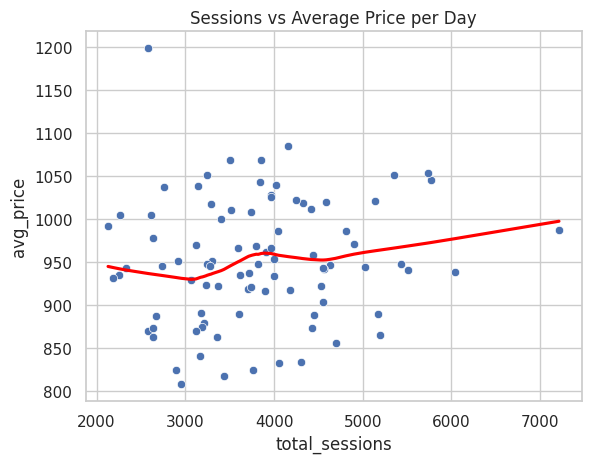

In [ ]:
sns.scatterplot(data=daily_data, x='total_sessions', y='avg_price')
sns.regplot(data=daily_data, x='total_sessions', y='avg_price', scatter=False, lowess=True, color='red')
plt.title('Sessions vs Average Price per Day')
plt.show()


In [ ]:
daily_data_clean = daily_data.dropna(subset=['avg_price'])

from scipy.stats import spearmanr

corr, p_value = spearmanr(daily_data_clean['total_sessions'], daily_data_clean['avg_price'])
print(f"Spearman correlation: {corr:.4f}, p-value: {p_value:.4f}")


Spearman correlation: 0.1497, p-value: 0.1639


There is no strong evidence that the number of sessions per day and average purchase price per day have a meaningful monotonic relationship in our data.

So days with more sessions do not consistently have higher or lower average purchase prices.

#Dashboards with visualizations:
[https://public.tableau.com/app/profile/mariia.viter/viz/Salesanalytics_17502822213790/SalesAnalytics?publish=yes](https://)

[https://public.tableau.com/app/profile/mariia.viter/viz/Salesdynamics_17502826933350/Salesdynamicsdash?publish=yes](https://)